# Customer Loan Default Risk Prediction using Machine Learning

This project focuses on predicting whether a customer will default on a loan using 
a synthetic dataset of 10,000+ records and 20 features.

## Objective
In this assignment, you will work with a **realistic synthetic dataset** of 
10,000 rows and 20 features, designed to mimic challenges in real-world data science projects. 

Your goal is to perform **complete data preprocessing, 
exploratory data analysis (EDA), 
feature engineering, and 
machine learning modeling**, 
and finally compare the performance of different algorithms.

## Loading Dataset and Required Libraries

We first import essential libraries and load the dataset for analysis
like pandas and numpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load dataset
df = pd.read_csv('synthetic_dataset_10000x20.csv')

In [4]:
# read dataset
df

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,...,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453,0
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,...,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST005735,54,44507.0,5975.0,2520.0,1,699.633352,31089.0,48,5.3,...,HS,Single,East,0,1,2020-02-27,3,0.699,-0.772764,1
9996,CUST005192,50,20651.0,10203.0,1020.0,3,680.774066,8977.0,60,9.6,...,PhD,Divorced,North,0,0,2018-08-23,3,0.435,-0.958924,0
9997,CUST005391,43,33827.0,3848.0,2562.0,1,655.562748,24319.0,60,4.3,...,HS,Married,West,0,0,2019-01-18,4,0.719,-0.916166,0
9998,CUST000861,44,38273.0,18880.0,1060.0,2,653.277645,1000.0,24,11.4,...,Other,Single,North,0,1,2019-08-04,6,0.026,-0.951602,0


### Key Understanding After Loading the Dataset

- The business goal is to predict customer loan default risk.
- Dataset contains 10,000+ customers and 20 financial and demographic features.
- Target column: `target_default_risk`.
- Contains both numeric and categorical features.

- Minor data quality issue (spelling) corrected in `education` feature.

In [5]:
# checking the null_values 
df.isnull().sum()

customer_id              0
age                      0
income                 318
savings                311
monthly_expenses       325
num_dependents           0
credit_score           326
loan_amount              0
loan_term_months         0
employment_years         0
home_ownership           0
education                0
marital_status           0
region                   0
recent_default           0
has_credit_card          0
signup_date              0
signup_dayofweek         0
debt_to_income           0
sin_age                  0
target_default_risk      0
dtype: int64

### null_values present
-Missing values exist in several numerical columns and must be imputed.
- we can use simple imputer or KNN.

### We found errors such as:

Spelling mistake in education: "Bachlors" → "Bachelors"

Important to fix before encoding.

In [6]:
# Fix spelling mistake in education column
df['education'] = df['education'].replace({'Bachlors': 'Bachelors'})
df['education'].value_counts()

education
Bachelors    4530
HS           2546
Masters      1962
Other         500
PhD           462
Name: count, dtype: int64

In [7]:
df.drop(columns=['customer_id','signup_date'],axis=1,inplace=True)

In [8]:
# Target and features
target = 'target_default_risk'
x = df.drop(columns=[target])
y = df[target]

### Visualization

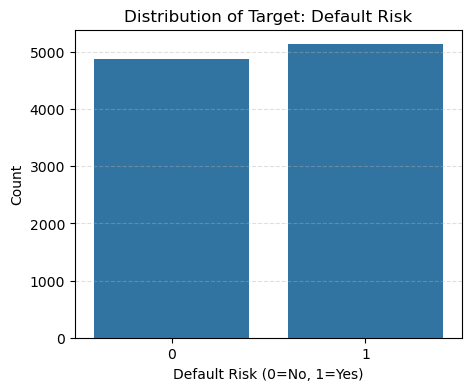

In [9]:
# Target Variable Distribution 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Distribution of Target: Default Risk")
plt.xlabel("Default Risk (0=No, 1=Yes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.4)

### Insight:
If both classes are nearly equal → good learning stability for ML models.

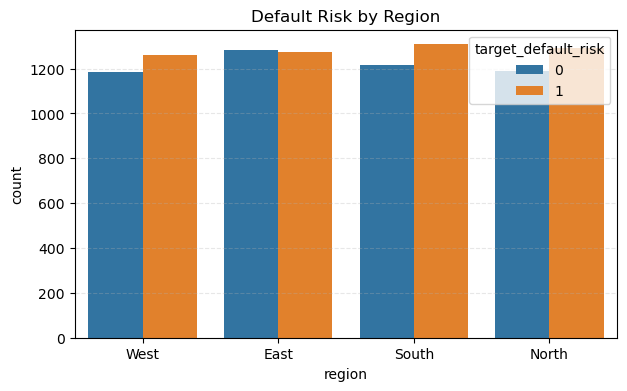

In [10]:
 ### Default Risk by Region (Categorical vs Target)
plt.figure(figsize=(7,4))
sns.countplot(x='region', hue='target_default_risk', data=df)
plt.title("Default Risk by Region")
plt.grid(axis='y', linestyle='--', alpha=0.3)

#### Insight:
Some regions may have higher financial risk.

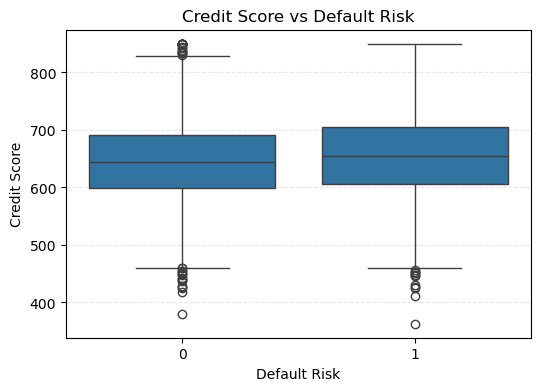

In [11]:
### Relationship Between Credit Score and Default 

plt.figure(figsize=(6,4))
sns.boxplot(x='target_default_risk', y='credit_score', data=df)
plt.title("Credit Score vs Default Risk")
plt.xlabel("Default Risk")
plt.ylabel("Credit Score")
plt.grid(axis='y', linestyle='--', alpha=0.3)

#### Insight:
Defaults should show lower credit scores.

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

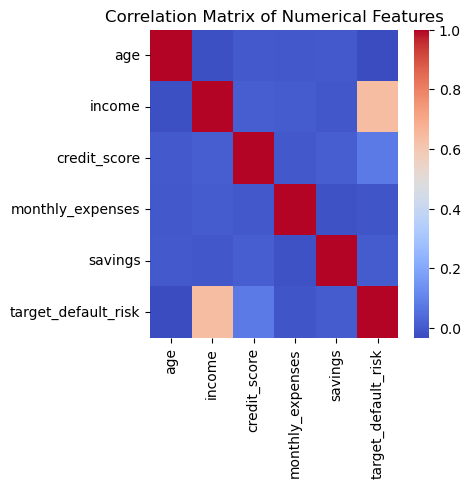

In [12]:
# Correlation Heatmap (Numerical Features) 
numeric_sample = ['age', 'income', 'credit_score', 'monthly_expenses', 'savings']
plt.figure(figsize=(4,4))
sns.heatmap(df[numeric_sample + [target]].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")

#### Insight:
Helps detect skewness and outlier patterns.

Skewness of Numerical Features:
monthly_expenses    9.137279
savings             2.017331
income              1.981728
age                 0.017033
credit_score        0.011039
dtype: float64


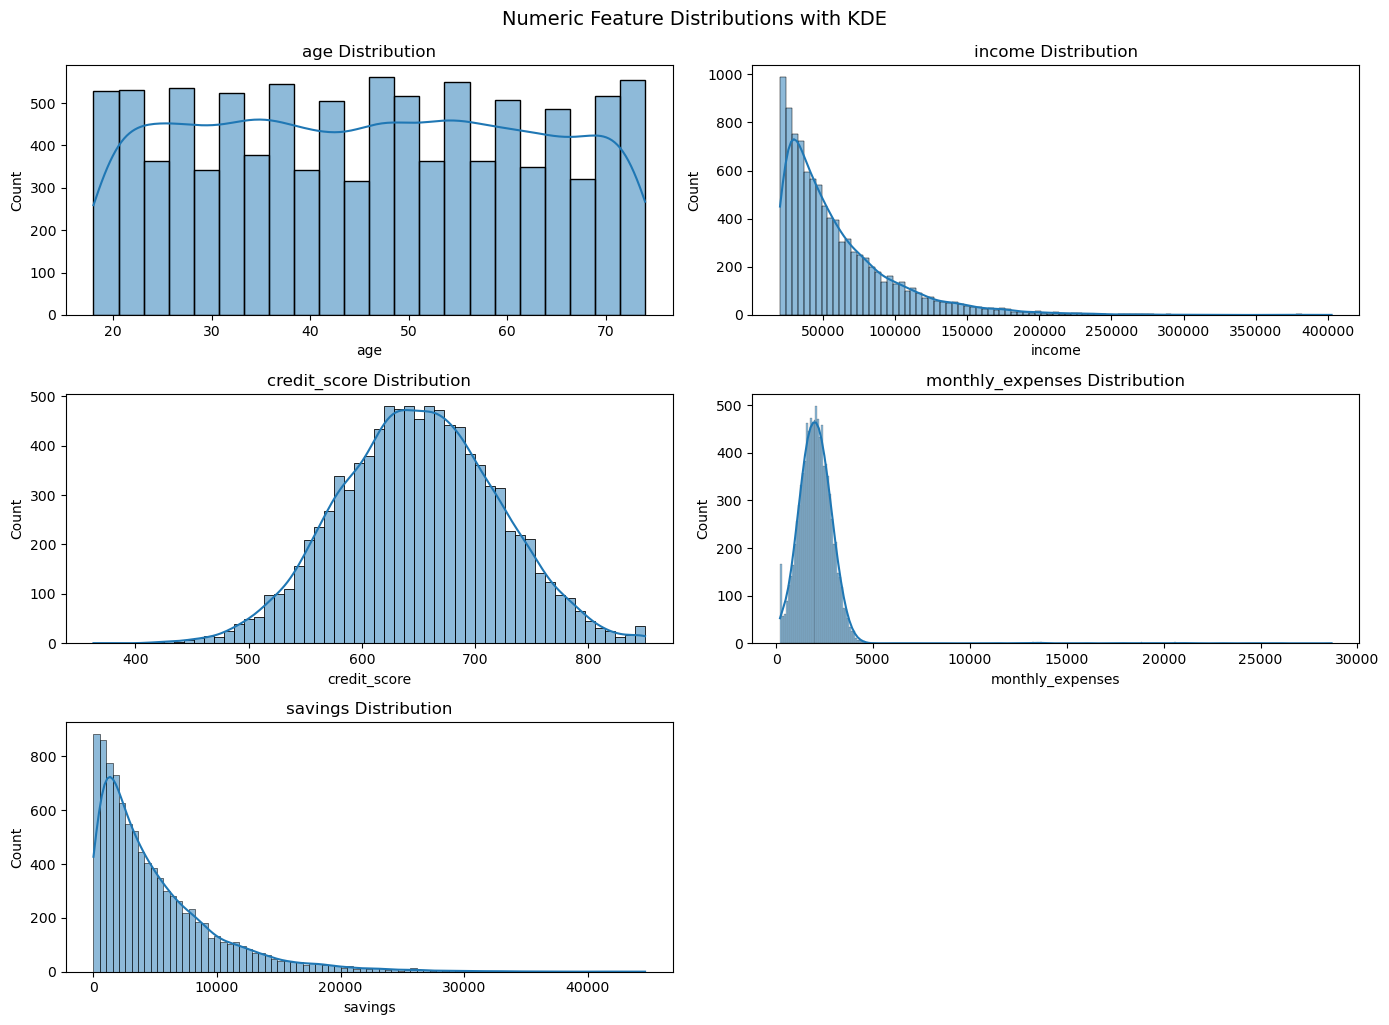

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_sample = ['age', 'income', 'credit_score', 'monthly_expenses', 'savings']

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_sample, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, edgecolor='black')
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.suptitle("Numeric Feature Distributions with KDE", y=1.02, fontsize=14)

skew_values = df[numeric_sample].skew().sort_values(ascending=False)
print("Skewness of Numerical Features:")
print(skew_values)


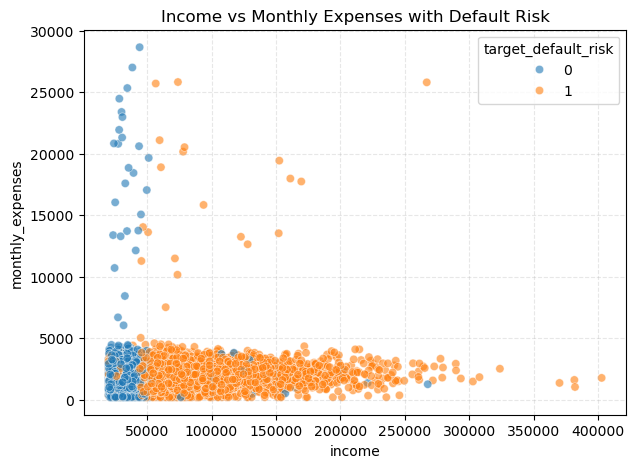

In [14]:
# Income vs Monthly Expenses: Default Impact 

plt.figure(figsize=(7,5))
sns.scatterplot(x='income', y='monthly_expenses', hue='target_default_risk', data=df, alpha=0.6)
plt.title("Income vs Monthly Expenses with Default Risk")
plt.grid(True, linestyle='--', alpha=0.3)

#### Insight:
Customers with low income and high expenses are more likely to default.

### Identify column types 
identify the categorical column and numeric column.

In [15]:
# Identify column types
categorical_ordinal = ['education']
categorical_nominal = ['home_ownership', 'marital_status', 'region']
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in categorical_ordinal + categorical_nominal]

In [16]:
# Encoding strategy
from sklearn.preprocessing import OrdinalEncoder

ordinal_mapping = [['Other', 'HS', 'Bachelors', 'Masters', 'PhD']]
ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping)

### using pipeliine for multiple task
 - using simple imputer and StandardScaler for the numerical column.
 - for the categorical_ordinal columns we are using same simple imputer
and OrdinalEncoder to encode the categorical_ordinal column.
 - for categorical_nominal column we are using same simple imputer
and OneHotEncoder to encode the categorical_nominal column

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_cols),

        ('ord', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ordinal', OrdinalEncoder(categories=ordinal_mapping))
        ]), categorical_ordinal),

        ('ohe', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_nominal)
    ],
    remainder='drop'
)


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
results = {}

def evaluate_model(name, model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred) * 100
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=500, C=2.0, penalty='l2'))
])
evaluate_model("Logistic Regression", log_reg, x_train, x_test, y_train, y_test)

Logistic Regression Accuracy: 93.7000


In [38]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = Pipeline([
    ('preprocess', preprocessor),
    ('clf', DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=42))
])
evaluate_model("Decision Tree", dt, x_train, x_test, y_train, y_test)

Decision Tree Accuracy: 94.4000


In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# SVM (RBF optimized)
svm_model = Pipeline([
    ('preprocess', preprocessor),
    ('clf', SVC(C=5, gamma='scale', kernel='rbf'))
])

param_grid_svm = {
    'clf__C': [5, 10, 20],
    'clf__gamma': ['scale', 0.1, 0.01]
}

svm_tuned = GridSearchCV(
    svm_model,
    param_grid_svm,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

svm_tuned.fit(x_train, y_train)
pred_svm = svm_tuned.predict(x_test)
acc_svm = accuracy_score(y_test, pred_svm)
evaluate_model("SVM", svm_tuned, x_train, x_test, y_train, y_test)

SVM Accuracy: 94.2500


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest (optimized)
rf = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=20,
        min_samples_split=5,
        random_state=42))
])
evaluate_model("Random Forest", rf, x_train, x_test, y_train, y_test)

Random Forest Accuracy: 94.6000


In [41]:
from xgboost import XGBClassifier
# XGBoost (high-performance tuning)
xgb = Pipeline([
    ('preprocess', preprocessor),
    ('clf', XGBClassifier(
        n_estimators=400,
        max_depth=8,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric='logloss',
        random_state=42))
])
evaluate_model("XGBoost", xgb, x_train, x_test, y_train, y_test)

XGBoost Accuracy: 95.8500


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Transform data using preprocessor
x_train_tf = preprocessor.fit_transform(x_train)
x_test_tf = preprocessor.transform(x_test)

# ANN Model
ann = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_tf.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_ann = ann.fit(
    x_train_tf, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

test_loss, ann_acc = ann.evaluate(x_test_tf, y_test, verbose=0)
print(f"ANN Accuracy: {ann_acc:.4f}")


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7060 - loss: 0.5631 - val_accuracy: 0.9075 - val_loss: 0.3087
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8660 - loss: 0.3416 - val_accuracy: 0.9337 - val_loss: 0.2613
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8969 - loss: 0.3013 - val_accuracy: 0.9425 - val_loss: 0.2441
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8935 - loss: 0.2951 - val_accuracy: 0.9400 - val_loss: 0.2362
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9134 - loss: 0.2526 - val_accuracy: 0.9406 - val_loss: 0.2285
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9200 - loss: 0.2627 - val_accuracy: 0.9463 - val_loss: 0.2194
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9243 - loss: 0.2454 - val_accuracy: 0.9450 - val_loss: 0.2148
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9249 - loss: 0.2485 - val_accu

In [49]:
print("\nModel Results:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")
print(f"ANN Accuracy: {ann_acc:.4f}")


Model Results:
Logistic Regression: 93.7000
Decision Tree: 94.4000
SVM: 94.2500
Random Forest: 94.6000
XGBoost: 95.8500
ANN Accuracy: 0.9500
